# Phân tách dữ liệu với DataFrame trong Python
## 1. Xử lý file csv
File cost_revenue_clean.csv là file đã được làm sạch những thông tin nhiễu, không chính xác và cả định dạng lại để máy tính có thể hiểu được. Chúng ta cần đưa dữ liệu này vào máy tính để có thể sử dụng cho các mô hình dự đoán

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('cost_revenue_clean.csv')

In [4]:
data

production_budget_usd  worldwide_gross_usd
0                   1000000                   26
1                     10000                  401
2                    400000                  423
3                    750000                  450
4                     10000                  527
...                     ...                  ...
5029              225000000           1519479547
5030              215000000           1671640593
5031              306000000           2058662225
5032              200000000           2207615668
5033              425000000           2783918982

[5034 rows x 2 columns]

Dữ liệu của chúng ta khoảng hơn 5000 bản ghi, do vậy để có thể nhìn dữ liệu này dưới góc nhìn khoa học, chúng ta sử dụng câu lệnh:

In [5]:
data.describe()

production_budget_usd  worldwide_gross_usd
count           5.034000e+03         5.034000e+03
mean            3.290784e+07         9.515685e+07
std             4.112589e+07         1.726012e+08
min             1.100000e+03         2.600000e+01
25%             6.000000e+06         7.000000e+06
50%             1.900000e+07         3.296202e+07
75%             4.200000e+07         1.034471e+08
max             4.250000e+08         2.783919e+09

### Chúng ta có các thông tin thống kê như sau: 
    - count: tổng số các bản ghi trong dữ liệu
    - min, max: giá trị lớn nhất nhỏ nhất trong dải dữ liệu
    - mean: giá trị trung bình 
Chú ý, khi làm việc với các số liệu dạng khoa học, các con số sẽ có định dạng khoa học theo kiểu hàm mũ, thay thế một phần số đó với $e +n$. Ví dụ: \
$ 12345678901 $ sẽ được hiển thị là $1.23e +10$

## 2. DataFrame 
DataFrame là cấu trúc dữ liệu hai chiều giống kiểu dạng bảng dữ liệu, nó cho phép áp dụng các thuật toán trên các dòng và cột.\
Để sử dụng DataFrame chúng ta cần import nó dưới dạng một thành phần của pandas

In [6]:
from pandas import DataFrame

In [7]:
x = DataFrame(data, columns= ['production_budget_usd'])
y = DataFrame(data, columns= ['worldwide_gross_usd'])

## 3. Trực quan hóa dữ liệu 
Trong Python, chúng ta có một module là matplotlib được sử dụng để vẽ biểu đồ từ dữ liệu.\
Chúng ta sẽ sử dụng một số chức năng trong matplotlib.pyplot để vẽ biểu đồ, để sử dụng thực hiện import module này:

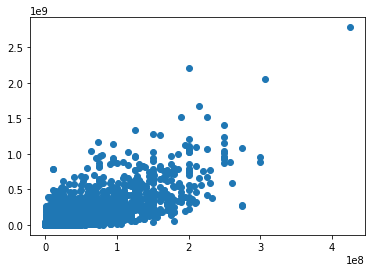

In [8]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

Với đồ thị này, chúng ta có thể cải tiến chút, giúp cho đồ thị có nhiều thông tin hơn:
- Thêm nhãn vào các trục tọa độ
- Thay đổi kích thước của đồ thị để có thể xem được tốt hơn.
- Vẽ đồ thị với dải dữ liệu có thể giúp bỏ đi các khoảng trống.
- Thêm thuộc tính độ trong suốt giúp chúng ta xem được mật độ điểm trên đồ thị.

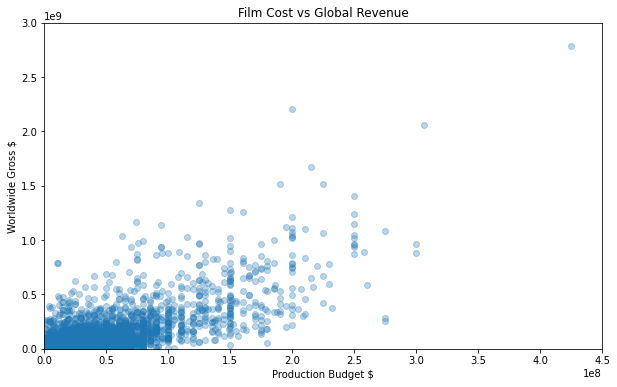

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x,y, alpha=0.3)
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.title('Film Cost vs Global Revenue')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

# Sử dụng Linear Regression để dự đoán
# $$ h_\theta(x) = \theta_0 +\theta_1 x $$ 
Để sử dụng thuật toán Linear Regression đã được cài đặt sẵn trong Scikit-learn, chúng ta thực hiện import thư viện này vào chương trình:

In [16]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x, y)

LinearRegression()

In [17]:
#theta_1
regression.coef_

array([[3.11150918]])

In [18]:
#theta_0
regression.intercept_

array([-7236192.72913963])

#### Với hai tham số $\theta_0$ và $\theta_1$ là đủ để chúng ta vẽ ra đường thẳng mô tả mối quan hệ giữa ngân sách và doanh thu trong làm phim ảnh

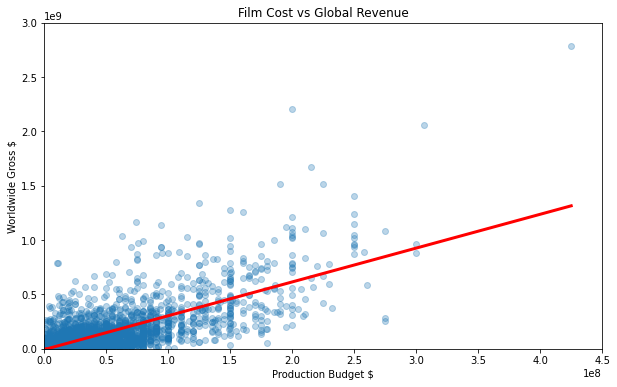

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.3)

# Adding the regression line here:
plt.plot(x, regression.predict(x), color='red', linewidth=3)

plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

# Dự đoán và đánh giá kết quả
Với kết quả các tham số $\theta_1$ (độ dốc) và $\theta_0$ (điểm cắt trục y), chúng ta có thể dự đoán được doanh thu của một phim với ngân sách cho trước như sau:

In [36]:
ngan_sach = int(input('nhập ngân sách cần dự đoán doanh thu tương ứng: '))

theta1 = regression.coef_
theta0 = regression.intercept_
doanh_thu = int(theta0 + theta1* ngan_sach)
print('doanh thu dự đoán với ngân sách {0:,d}$ sẽ là : {1:,.3f}$'.format(ngan_sach, doanh_thu))

nhập ngân sách cần dự đoán doanh thu tương ứng: 2000000000
doanh thu dự đoán với ngân sách 2,000,000,000$ sẽ là : 6,215,782,173.000$


#### Để đánh giá kết quả khi áp dụng Linear Regression chúng ta có một phương thức là score(), phương thức này trả về một hệ số xác định cho R^2.

In [39]:
regression.score(x,y)

0.5496485356985727

Nhận thấy hệ số $R^2$ ở đây là $0.55 \le 1$ vậy mô hình vẫn chưa phù hợp và dự đoán tốt cho thực tế với tỉ lệ thành công 55% 